In [1]:
%matplotlib inline
import numpy as np
from nn_classes import *
import os
#import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import seaborn as sn
from msw_model_2019_annotated import *
from DA_2019 import *

## Data generation for training

In [27]:
nens = 50
n_train = 3000
n_val = 50
cycles = 50
samples = 50

In [28]:
DataGenerator_uniform(nens=nens,cycles=cycles,n_train=n_train,n_val=n_val,mode='val')

## ML training

In [29]:
train_rf(nens=nens,n_estimator=100,max_depth=50)

model_rf score 0.5414087787363758


In [ ]:
train_bnn(nens=nens,epochs=125,val_obs=False)

## Save input, output, ground truth for validation/test set for plotting

In [5]:
save_parameter_preds(nens=nens,n_train=n_train,exp_ID_total=n_val,val_obs=False)

In [30]:
save_parameter_preds_rf(nens=nens,n_train=n_train,exp_ID_total=n_val)

created folder :  data/parameters_rf/50_nens/3000_ntrain/0
created folder :  data/parameters_rf/50_nens/3000_ntrain/1
created folder :  data/parameters_rf/50_nens/3000_ntrain/2
created folder :  data/parameters_rf/50_nens/3000_ntrain/3
created folder :  data/parameters_rf/50_nens/3000_ntrain/4
created folder :  data/parameters_rf/50_nens/3000_ntrain/5
created folder :  data/parameters_rf/50_nens/3000_ntrain/6
created folder :  data/parameters_rf/50_nens/3000_ntrain/7
created folder :  data/parameters_rf/50_nens/3000_ntrain/8
created folder :  data/parameters_rf/50_nens/3000_ntrain/9
created folder :  data/parameters_rf/50_nens/3000_ntrain/10
created folder :  data/parameters_rf/50_nens/3000_ntrain/11
created folder :  data/parameters_rf/50_nens/3000_ntrain/12
created folder :  data/parameters_rf/50_nens/3000_ntrain/13
created folder :  data/parameters_rf/50_nens/3000_ntrain/14
created folder :  data/parameters_rf/50_nens/3000_ntrain/15
created folder :  data/parameters_rf/50_nens/3000_

# Data assimilation cycles with constant true/false/bnn parameters

In [ ]:
obs_ncyc = 2
DA(mode='bnn',DA_cycles_total=100,exp_ID_start=40,exp_ID_end=60,nens=nens,samples=50,obs_ncyc=obs_ncyc)
DA(mode='true',DA_cycles_total=100,exp_ID_start=40,exp_ID_end=60,nens=nens,samples=50,obs_ncyc=obs_ncyc)
DA(mode='false',DA_cycles_total=100,exp_ID_start=40,exp_ID_end=60,nens=nens,samples=50,obs_ncyc=obs_ncyc)

# Plots

In [31]:
nens = 50
n_train = 3000
n_val = 50
samples = 50
exp_ID = 0

## Training

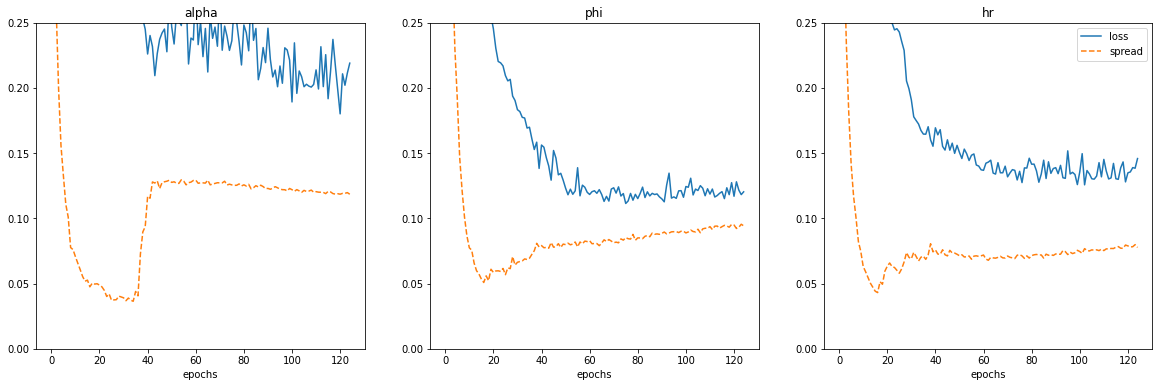

In [9]:
# validation loss+spread for all three parameters against epochs during training
%matplotlib inline
nens = 100
val_loss_spread = np.loadtxt('logs/'+str(nens)+'.csv',delimiter=',',skiprows=1)

fig, ax = plt.subplots(1,3,figsize = (20,6))

params_names = ['alpha','phi','hr']
ylabels = ['','','']

for i in range(3):
    ax[i].plot(val_loss_spread[:,i],'-',label='loss')
    ax[i].plot(val_loss_spread[:,i+3],'--',label='spread')
    ax[i].set_title(params_names[i])
    ax[i].set_ylabel(ylabels[i])
    ax[i].set_xlabel('epochs')
    ax[i].set_ylim(0,0.25)
plt.legend()

## Inference

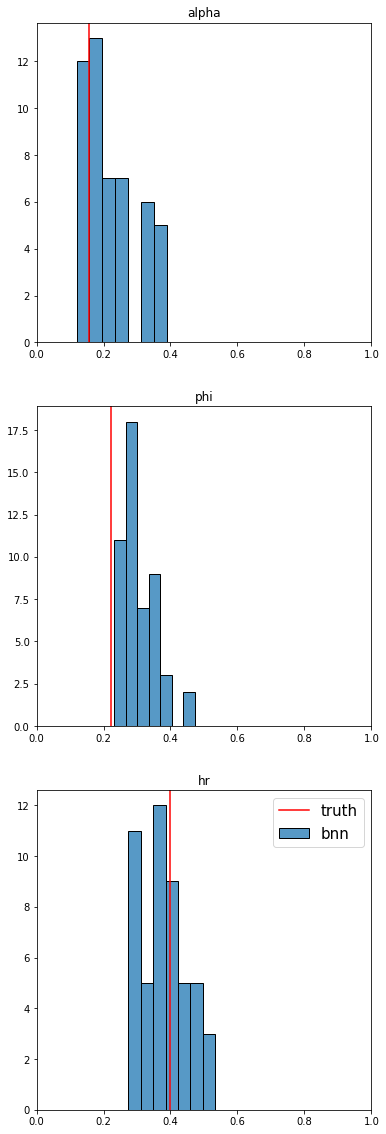

In [8]:
# histogramm of parameter predictions
%matplotlib inline
plot_parameters_hist('rf',3,nens,n_train,samples)

(array([0.20067085, 0.17652744, 0.23669121]),
 array([0.11054124, 0.09732582, 0.10902556]))

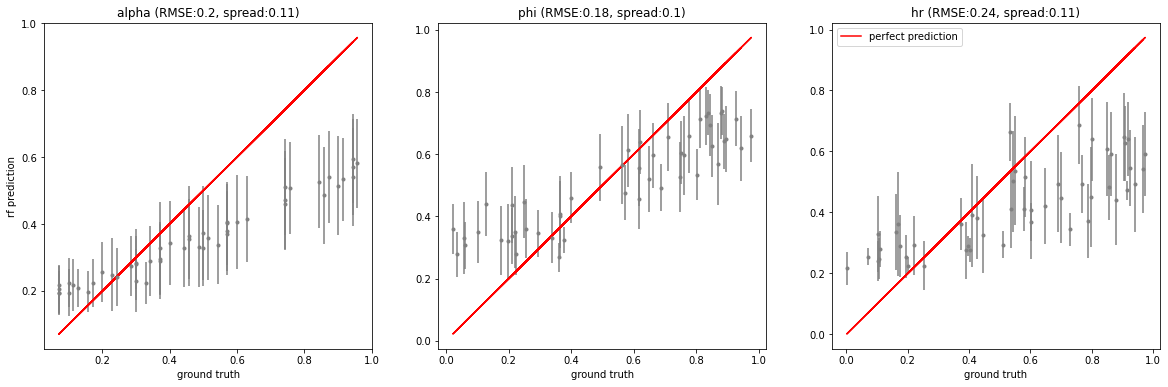

In [32]:
# scatter plot predictions against ground truth for all n_val validation/test parameters
%matplotlib inline
plot_parameters('rf',nens,n_train,n_val,samples)

## Data assimilation with bnn/true/false parameters

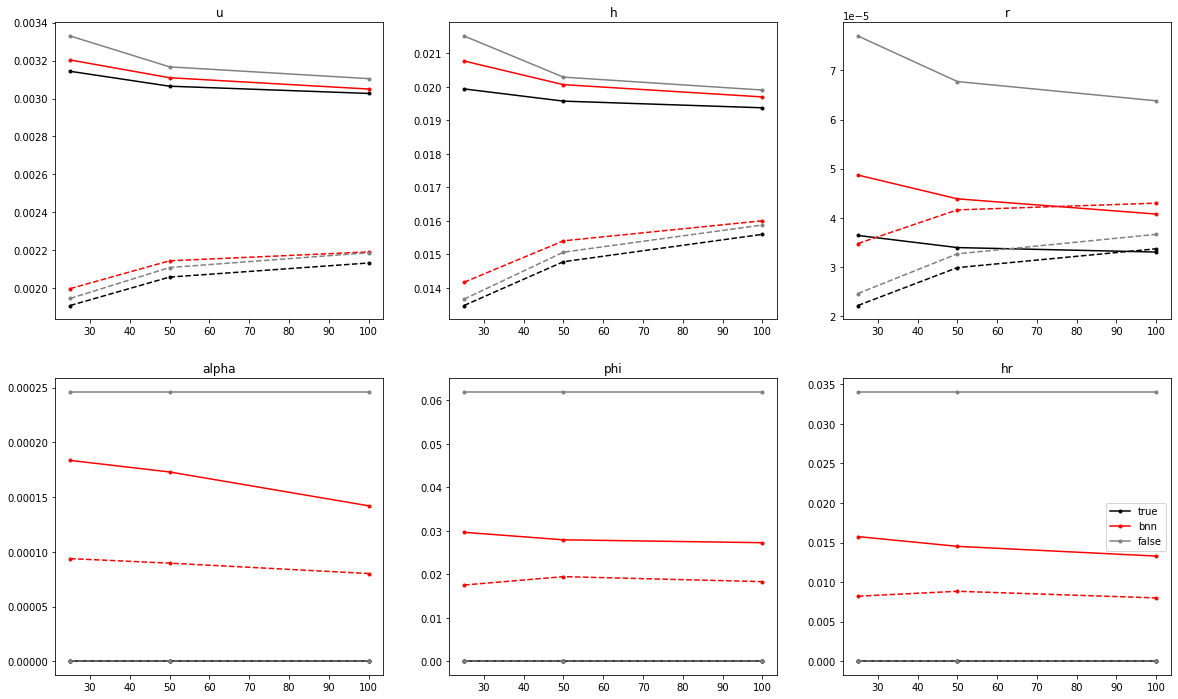

In [9]:
# RMSE and spreads of atmospheric variables (u/h/r) and model parameters (alpha/phic/hr) against DA ensemble size
%matplotlib inline
DA_cycles = 100
nens = [25,50,100]
ID_start = 0
ID_end = 60
IDs = ID_end-ID_start

modes = ['true','bnn','false']
n = 0
rmse_spread_params = np.zeros((IDs,len(modes),len(nens),DA_cycles,6))
rmse_spread_vars = np.zeros((IDs,len(modes),len(nens),DA_cycles,6))

for j,mode in enumerate(modes):
    for k,ens in enumerate(nens):
        for exp_ID in range(ID_start,ID_end):
            for i in range(DA_cycles):
                data = np.loadtxt('data/online/metrics/'+mode+'/'+str(ens)+'/'+str(exp_ID)+'/'+str(i)+'.csv',delimiter=',')
                rmse_spread_params[exp_ID,j,k,i,:] = data[0,:]
                rmse_spread_vars[exp_ID,j,k,i,:] = data[1,:]
            
rmse_spread_params = np.mean(np.mean(rmse_spread_params,axis=0)[:,:,DA_cycles-50:,:],axis=2)
rmse_spread_vars = np.mean(np.mean(rmse_spread_vars,axis=0)[:,:,DA_cycles-50:,:],axis=2)

ylabels_vars = ['u','h','r']
ylabels_params = ['alpha','phi','hr']
labels = ['true','bnn','false']
colors = ['black','red','gray']

fig, ax = plt.subplots(2,3,figsize = (20,12))

for i in range(3):
    for j in range(len(modes)):
        ax[0,i].plot(nens,rmse_spread_vars[j,:,i],'.-',color=colors[j],label=labels[j])
        ax[0,i].plot(nens,rmse_spread_vars[j,:,i+3],'.--',color=colors[j])
        ax[1,i].plot(nens,rmse_spread_params[j,:,i],'.-',color=colors[j],label=labels[j])
        ax[1,i].plot(nens,rmse_spread_params[j,:,i+3],'.--',color=colors[j])
    ax[0,i].set_title(ylabels_vars[i])
    ax[1,i].set_title(ylabels_params[i])
plt.legend()